<a href="https://colab.research.google.com/github/inuwamobarak/Phone-Data-Analysis-and-Price-Prediction/blob/main/Copy_of_Mobile_Phone_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this work I try to solve the problem of providing a standardized  phone sales rate according to its features and also perform analysis on the features and how the users and market act!

* The considered phone features include:
    * id:ID
    * battery_power:Total energy a battery can store in one time measured in mAh
    * blue:Has bluetooth or not
    * clock_speed:speed at which microprocessor executes instructions
    * dual_sim:Has dual sim support or not
    * fc:Front Camera mega pixels
    * four_g:Has 4G or not
    * int_memory:Internal Memory in Gigabytes
    * m_dep:Mobile Depth in cm
    * mobile_wt:Weight of mobile phone
    * n_cores:Number of cores of processor
    * pc:Primary Camera mega pixels
    * px_height:Pixel Resolution Height
    * px_width:Pixel Resolution Width
    * ram:Random Access Memory in Megabytes
    * sc_h:Screen Height of mobile in cm
    * sc_w:Screen Width of mobile in cm
    * talk_time:longest time that a single battery charge will last when you are
    * three_g:Has 3G or not
    * touch_screen:Has touch screen or not
    * wifi:Has wifi or not





## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/train.csv')

In [ ]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Exploratory Data Analysis (EDA)

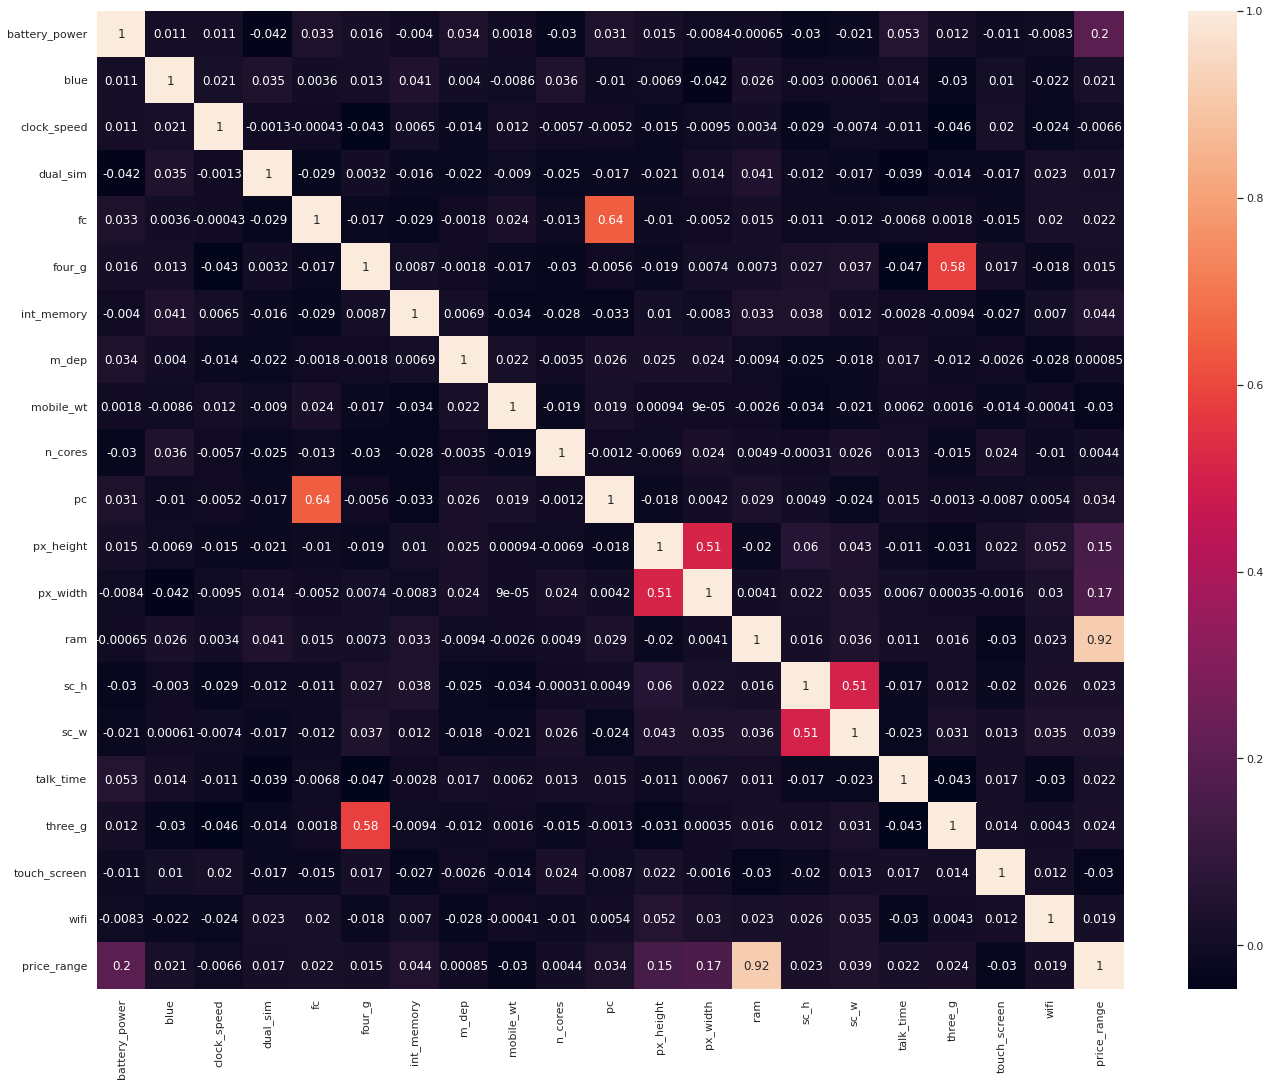

In [ ]:
# Draw a heatmap with the numeric values in each cell
plt.figure(figsize=(23,18))
sns.heatmap(dataset.corr(),annot=True)

I like to first run a general view of the whole variables so that I could see a quick overview of the dataset before knowing where to focus.
Since the phone price is the most important information, we will use it as our reference point.
It shows that:
RAM
*   battery_power
 and,

*   px_height
px_widght
int_memory
pc
sc_w


has highest effect on the cost of a phone. We will only focus on these for EDA.



### Finding Correlation between phone RAMs and their Prices

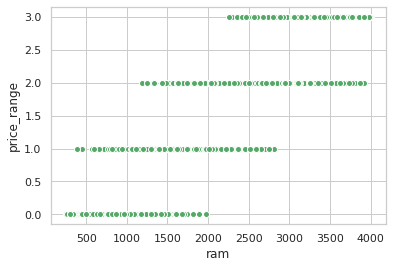

In [ ]:
sns.scatterplot(x='ram',y='price_range', data=dataset, color='g',linewidth=1);

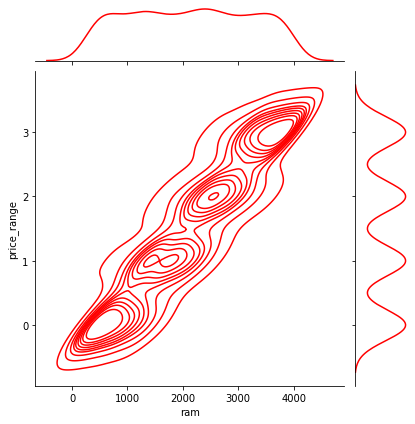

In [ ]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

The two plots above shows that there is a positive correlation between the two variables or phone features. This means that as the RAM size of a phone increases so also its prices increases. RAM is then possibly a very valuable feature in phone worth.

## Finding relationship between px_height and Price Range

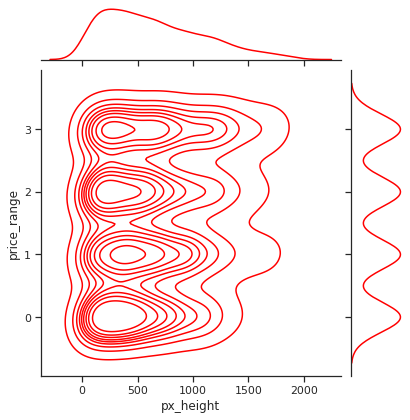

In [ ]:
sns.jointplot(x='px_height',y='price_range',data=dataset,color='red',kind='kde');

## Finding relationship between px_width and Price Range

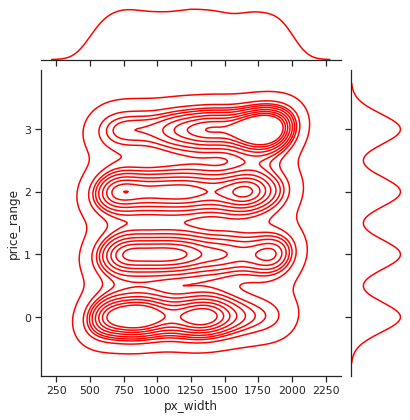

In [ ]:
sns.jointplot(x='px_width',y='price_range',data=dataset,color='red',kind='kde');

### Finding relationship between Internal Memory and Price Range

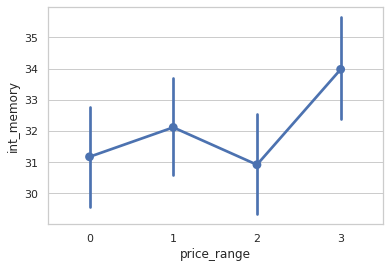

In [ ]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

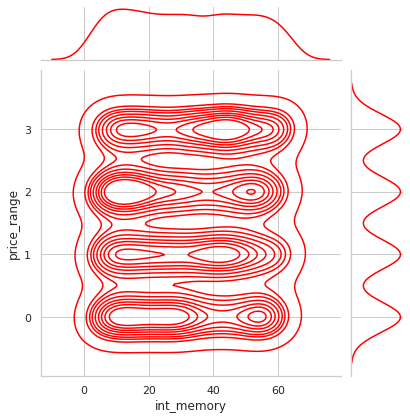

In [ ]:
#sns.scatterplot(x='int_memory',y='price_range', data=dataset, color='g',linewidth=1);
sns.jointplot(x='int_memory',y='price_range',data=dataset,color='red',kind='kde');

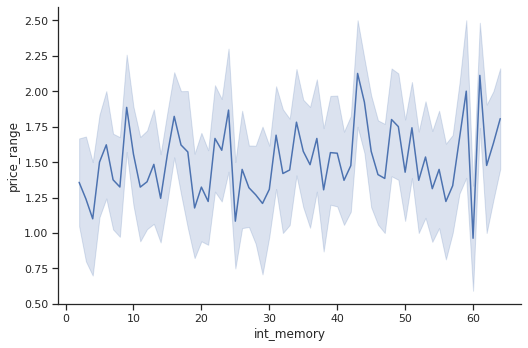

In [ ]:
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

#sns.jointplot(x='int_memory',y='price_range',data=dataset,color='red',kind='kde');
# Plot the lines on two facets
sns.relplot(
    data=dataset,
    x="int_memory", y="price_range", kind="line", palette=palette,
    height=5, aspect=1.5, facet_kws=dict(sharex=False),
)

- Though the second graph does not work well here with the variables/distribution hence it does not show details well. The other two shows a slight increase in the price in respect to an increase in the internal memory of phones.

# Lets further see Percentages of certain binary features

## Percentage of Phones with Bluetooth

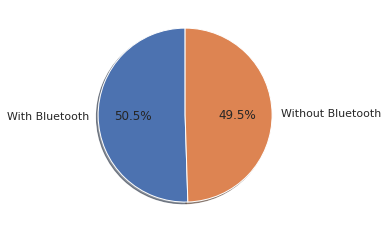

In [ ]:
labels = ["With Bluetooth",'Without Bluetooth']
values=dataset['blue'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

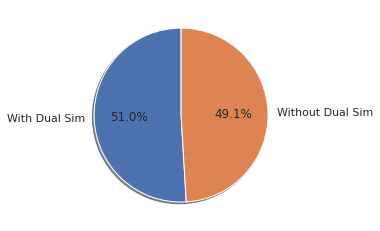

In [ ]:
labels = ["With Dual Sim",'Without Dual Sim']
values=dataset['dual_sim'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

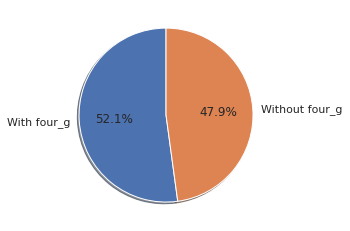

In [ ]:
labels = ["With four_g",'Without four_g']
values=dataset['four_g'].value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## Percentage of Phones which supports 3G

In [ ]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values

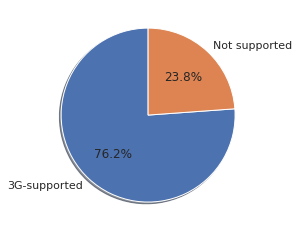

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()


### Battery power vs Price Range

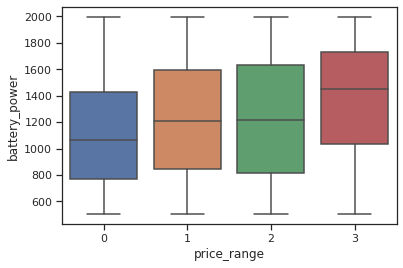

In [ ]:
sns.boxplot(x="price_range", y="battery_power", data=dataset)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

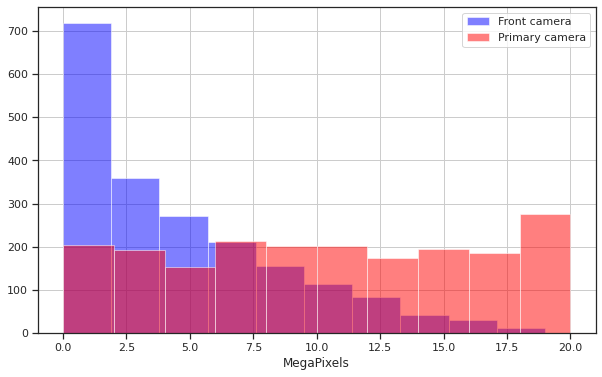

In [ ]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### Mobile Weght vs Price range

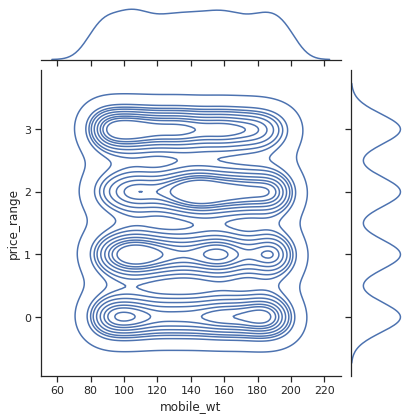

In [ ]:
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde');

### Talk time vs Price range

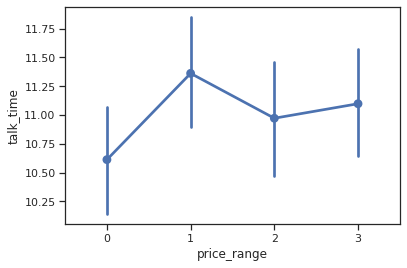

In [ ]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

## X & Y array

In [ ]:
X=dataset.drop('price_range',axis=1)

In [ ]:
y=dataset['price_range']

## Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Creating & Training Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm.score(X_test,y_test)

0.9132801488185277

## Creating & Training KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.score(X_test,y_test)

0.9212121212121213

### Elbow Method For optimum value of K

In [ ]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

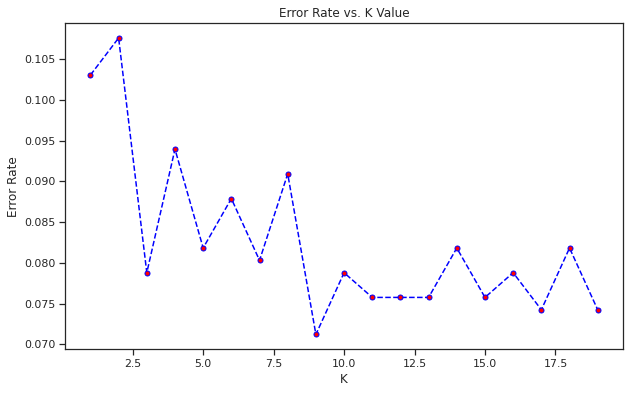

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Creating & Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()


In [ ]:
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logmodel.score(X_test,y_test)

0.6181818181818182

## Creating & Training Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_test,y_test)

0.8166666666666667

## Tree Visualization

In [ ]:
feature_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']

In [ ]:
#For tree Visualization as kaggle does't support pydotplus just install the pydotplus in your systems's conda terminal
'''
import pydotplus as pydot

from IPython.display import Image

from sklearn.externals.six import StringIO

dot_data = StringIO()

tree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)

graph = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())'''

'\nimport pydotplus as pydot\n\nfrom IPython.display import Image\n\nfrom sklearn.externals.six import StringIO\n\ndot_data = StringIO()\n\ntree.export_graphviz(dtree, out_file=dot_data,feature_names=feature_names)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())\n\nImage(graph.create_png())'

In [ ]:
#Another way
'''from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())'''  

'from IPython.display import Image  \nfrom sklearn.externals.six import StringIO  \nfrom sklearn.tree import export_graphviz\nimport pydot \nimport os\nos.environ["PATH"] += os.pathsep + \'C:/Program Files (x86)/Graphviz2.38/bin/\'\ndot_data = StringIO()  \nexport_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)\n\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())  \nImage(graph[0].create_png())'

## Creating & Training Random Tree Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(X_test,y_test)

0.8651515151515151

# Conclusion: KNN & Linear Regression performed the best

## RESULT : Linear Regression

In [ ]:
y_pred=lm.predict(X_test)


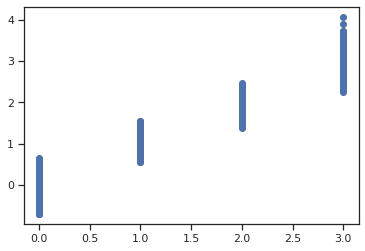

In [ ]:
plt.scatter(y_test,y_pred)


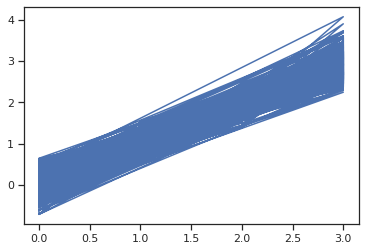

In [ ]:
plt.plot(y_test,y_pred)

## RESULT: KNN

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       158
           1       0.88      0.95      0.91       152
           2       0.93      0.85      0.89       199
           3       0.92      0.93      0.93       151

    accuracy                           0.93       660
   macro avg       0.93      0.93      0.93       660
weighted avg       0.93      0.93      0.93       660



In [ ]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[156   2   0   0]
 [  6 144   2   0]
 [  0  17 170  12]
 [  0   0  10 141]]


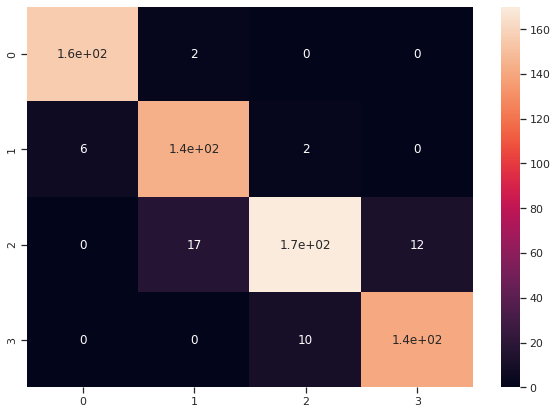

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)


# Price prediction of Test.csv Using KNN for Prediction

### Import test.csv

In [ ]:
data_test=pd.read_csv('../input/test.csv')

In [ ]:
data_test.head()

In [ ]:
data_test=data_test.drop('id',axis=1)

In [ ]:
data_test.head()

# Model

In [ ]:
predicted_price=knn.predict(data_test)

# Predicted Price Range

In [ ]:
predicted_price

# Adding Predicted price to test.csv

In [ ]:
data_test['price_range']=predicted_price

In [ ]:
data_test